In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# from imblearn.over_sampling import RandomOverSampler
# sns.set(style='whitegrid')

# import warnings
# warnings.filterwarnings("ignore")

### Import Dataset

In [3]:
df = pd.read_csv("data1.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
le = LabelEncoder()

In [6]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Vehicle_Damage'] = le.fit_transform(df['Vehicle_Damage'])

In [7]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [8]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [9]:
order = ["< 1 Year", "1-2 Year", "> 2 Years"]
df["Vehicle_Age"] = pd.Categorical(df["Vehicle_Age"], categories=order, ordered=True)

In [10]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [11]:
df['Region_Code'].dtype

dtype('float64')

In [12]:
df['Annual_Premium'].dtype

dtype('float64')

In [13]:
df['Policy_Sales_Channel'].dtype

dtype('float64')

In [14]:
df["Region_Code"] = df["Region_Code"].astype(int)
df['Policy_Sales_Channel'] = df['Policy_Sales_Channel'].astype(int)
df['Annual_Premium'] = df['Annual_Premium'].astype(int)

In [15]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0


- id: Unique ID for the customer
- Gender: Gender of the customer [0 : Female, 1 : Male]
- Age: Age of the customer
- Driving_License: [0 : Customer does not have DL, 1 : Customer already has DL]
- Region_Code: Unique code for the region of the customer
- Previously_Insured: [1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance]
- Vehicle_Age: Age of the Vehicle
- Vehicle_Damage: [1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.]
- Annual_Premium: The amount customer needs to pay as premium in the year
- Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In - - Person, etc.
- Vintage: Number of Days, Customer has been associated with the company
- Response: [1 : Customer is interested, 0 : Customer is not interested]

## EDA

In [16]:
df.shape

(381109, 12)

In [17]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   id                    381109 non-null  int64   
 1   Gender                381109 non-null  int64   
 2   Age                   381109 non-null  int64   
 3   Driving_License       381109 non-null  int64   
 4   Region_Code           381109 non-null  int64   
 5   Previously_Insured    381109 non-null  int64   
 6   Vehicle_Age           381109 non-null  category
 7   Vehicle_Damage        381109 non-null  int64   
 8   Annual_Premium        381109 non-null  int64   
 9   Policy_Sales_Channel  381109 non-null  int64   
 10  Vintage               381109 non-null  int64   
 11  Response              381109 non-null  int64   
dtypes: category(1), int64(11)
memory usage: 32.3 MB


In [19]:
df.describe(
    
)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [20]:
df['Response'].value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

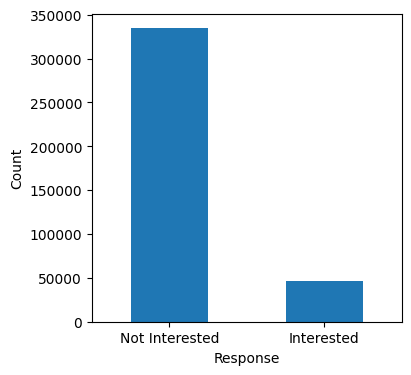

In [21]:
value_counts = df['Response'].value_counts().sort_index()

plt.figure(figsize=(4,4))
ax = value_counts.plot(kind='bar')

ax.set_xticklabels(["Not Interested", "Interested"], rotation=0)

plt.ylabel('Count')
plt.show()

In [22]:
df["Vehicle_Age"].value_counts()


Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64

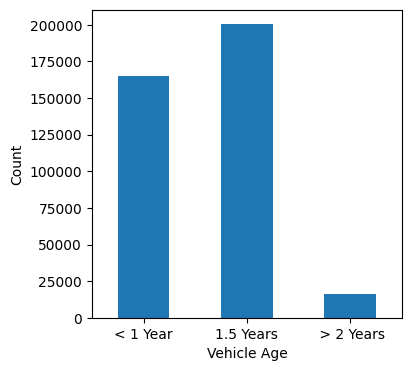

In [23]:
value_counts = df['Vehicle_Age'].value_counts().sort_index()

plt.figure(figsize=(4,4))
ax = value_counts.plot(kind='bar')

ax.set_xticklabels(["< 1 Year", "1.5 Years", " > 2 Years"], rotation=0)

plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()

In [24]:
df.groupby('Vehicle_Age')['Response'].value_counts()

C:\Users\HP\AppData\Local\Temp\ipykernel_5272\3036256938.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Vehicle_Age')['Response'].value_counts()


Vehicle_Age  Response
< 1 Year     0           157584
             1             7202
1-2 Year     0           165510
             1            34806
> 2 Years    0            11305
             1             4702
Name: count, dtype: int64

In [25]:
summary = df.groupby("Vehicle_Age")["Response"].agg(
    total="count",
    interested=lambda x: (x == 1).sum(),
    not_interested=lambda x: (x == 0).sum()
)

summary["interest_rate_%"] = (summary["interested"] / summary["total"]) * 100
summary

C:\Users\HP\AppData\Local\Temp\ipykernel_5272\942447214.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = df.groupby("Vehicle_Age")["Response"].agg(


,total,interested,not_interested,interest_rate_%
Vehicle_Age,,,,
< 1 Year,164786,7202,157584,4.370517
1-2 Year,200316,34806,165510,17.375547
> 2 Years,16007,4702,11305,29.374649


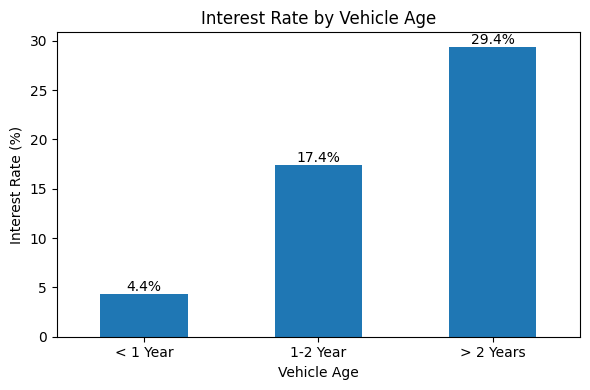

In [26]:
plt.figure(figsize=(6,4))
ax = summary["interest_rate_%"].plot(kind="bar", rot=0)

plt.title("Interest Rate by Vehicle Age")
plt.xlabel("Vehicle Age")
plt.ylabel("Interest Rate (%)")

# show values on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",
                (p.get_x() + p.get_width()/2, p.get_height()),
                ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

In [27]:
gender_count = df['Gender'].value_counts()
gender_count

Gender
1    206089
0    175020
Name: count, dtype: int64

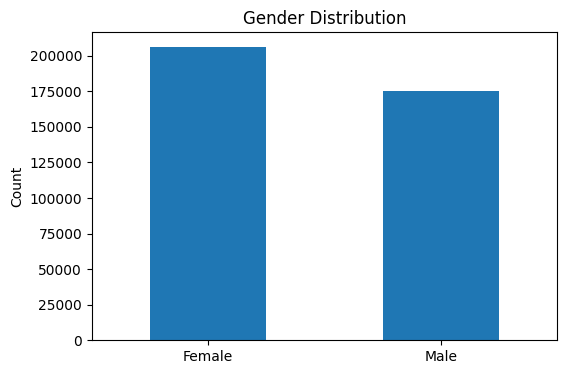

In [28]:
plt.figure(figsize=(6,4))

ax = gender_count.plot(kind='bar')
ax.set_xticklabels(["Female", "Male"], rotation=0)

plt.xlabel('')
plt.ylabel('Count')
plt.title('Gender Distribution')

plt.show()

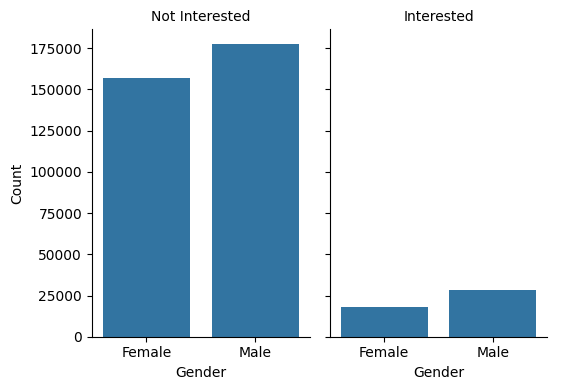

In [29]:
data = (
    df.assign(Gender=df["Gender"].map({0: "Female", 1: "Male"}))
      .groupby(["Gender", "Response"])["id"]
      .count()
      .reset_index(name="count")
)

data["Response"] = data["Response"].map({0: "Not Interested", 1: "Interested"})

g = sns.catplot(
    x="Gender", y="count", col="Response",
    data=data, kind="bar", height=4, aspect=.7
)

g.set_titles("{col_name}")
g.set_axis_labels("Gender", "Count")

In [30]:
df['Driving_License'].value_counts()

Driving_License
1    380297
0       812
Name: count, dtype: int64

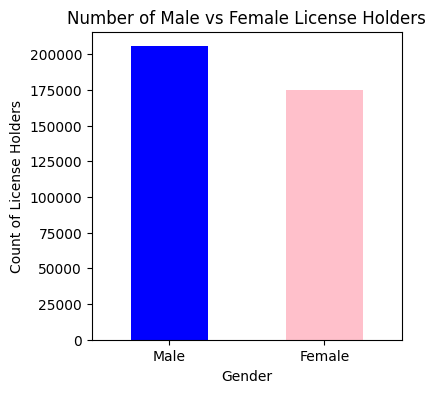

In [31]:
license_holders = df[df['Driving_License'] == 1]

# Group by Gender and count the number of license holders per gender
gender_counts = license_holders['Gender'].value_counts()

# Plotting
plt.figure(figsize=(4, 4))
ax = gender_counts.plot(kind='bar', color=['blue', 'pink'])
ax.set_xticklabels(["Male", "Female"], rotation=0)
plt.title('Number of Male vs Female License Holders')
plt.xlabel('Gender')
plt.ylabel('Count of License Holders')
plt.xticks(rotation=0)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5272\976095093.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Not Damaged", "Damaged"], rotation=0)


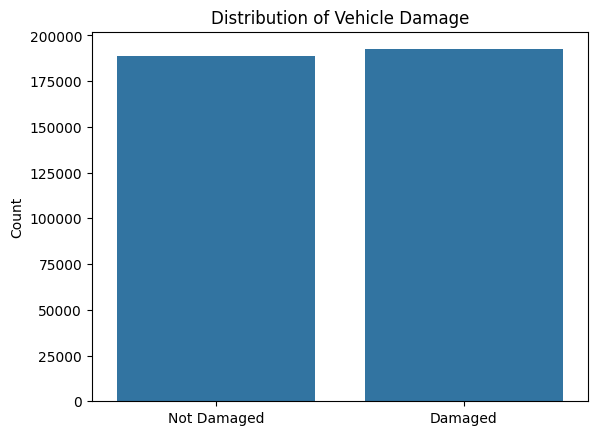

In [32]:
# dist for Vehicle_Damage col

ax = sns.countplot(data=df, x='Vehicle_Damage')
ax.set_xticklabels(["Not Damaged", "Damaged"], rotation=0)
plt.title('Distribution of Vehicle Damage')
plt.xlabel('')
plt.ylabel('Count')
plt.show()

### Data Preprocessing

In [33]:
num_feat = ['Age','Vintage']
cat_feat = ['Gender', 'Driving_License', 'Previously_Insured', 'Vehicle_Age_lt_1_Year',
'Vehicle_Age_gt_2_Years','Vehicle_Damage','Region_Code','Policy_Sales_Channel']

In [34]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,> 2 Years,1,40454,26,217,1
1,2,1,76,1,3,0,1-2 Year,0,33536,26,183,0
2,3,1,47,1,28,0,> 2 Years,1,38294,26,27,1
3,4,1,21,1,11,1,< 1 Year,0,28619,152,203,0
4,5,0,29,1,41,1,< 1 Year,0,27496,152,39,0


In [35]:
age_dummies = pd.get_dummies(df["Vehicle_Age"], prefix="Vehicle_Age")

# Drop the one you don't want
age_dummies = age_dummies.drop(columns=["Vehicle_Age_1-2 Year"])

# Add back to dataframe
df = pd.concat([df.drop(columns=["Vehicle_Age"]), age_dummies], axis=1)


In [36]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Vehicle_Age_< 1 Year,Vehicle_Age_> 2 Years
0,1,1,44,1,28,0,1,40454,26,217,1,False,True
1,2,1,76,1,3,0,0,33536,26,183,0,False,False
2,3,1,47,1,28,0,1,38294,26,27,1,False,True
3,4,1,21,1,11,1,0,28619,152,203,0,True,False
4,5,0,29,1,41,1,0,27496,152,39,0,True,False


In [37]:
df = df.rename(columns={"Vehicle_Age_< 1 Year": "Vehicle_Age_lt_1_Year", "Vehicle_Age_> 2 Years": "Vehicle_Age_gt_2_Years"})
df['Vehicle_Age_lt_1_Year'] = df['Vehicle_Age_lt_1_Year'].astype('int')
df['Vehicle_Age_gt_2_Years'] = df['Vehicle_Age_gt_2_Years'].astype('int')

In [38]:
df['Vehicle_Damage'] = df['Vehicle_Damage'].astype('int')

In [39]:
for column in cat_feat:
    df[column] = df[column].astype('str')

In [40]:
# scaling the data

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler

ss = StandardScaler()
df[num_feat] = ss.fit_transform(df[num_feat])


mm = MinMaxScaler()
df[['Annual_Premium']] = mm.fit_transform(df[['Annual_Premium']])

# also, dropping id col now
id=df.id
df=df.drop('id',axis=1)

In [41]:
# train-test split

from sklearn.model_selection import train_test_split

train_target=df['Response']
train=df.drop(['Response'], axis = 1)
x_train,x_test,y_train,y_test = train_test_split(train,train_target, random_state = 0)

In [42]:
train.shape

(381109, 11)

In [43]:
train_target.shape

(381109,)

# Model Training - Random Forest 

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(
    estimator=clf,
    param_distributions=random_search,
    n_iter=10,
    cv=4,
    verbose=1,
    random_state=101,
    n_jobs=1   # ✅ fix
)
model.fit(x_train, y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


,"estimator estimator: estimator objectAn object of that type is instantiated for each grid point.This is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestClassifier()
,"param_distributions param_distributions: dict or list of dictsDictionary with parameters names (`str`) as keys and distributionsor lists of parameters to try. Distributions must provide a ``rvs``method for sampling (such as those from scipy.stats.distributions).If a list is given, it is sampled uniformly.If a list of dicts is given, first a dict is sampled uniformly, andthen a parameter is sampled using that dict as above.","{'criterion': ['entropy', 'gini'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [4, 6, ...], 'min_samples_split': [5, 7, ...], ...}"
,"n_iter n_iter: int, default=10Number of parameter settings that are sampled. n_iter tradesoff runtime vs quality of the solution.",10
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.If None, the estimator's score method is used.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given the ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``RandomizedSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionc

In [46]:
best_params = model.best_params_
best_params

{'n_estimators': 300,
 'min_samples_split': 7,
 'min_samples_leaf': 6,
 'max_depth': 10,
 'criterion': 'entropy'}

In [47]:
import pickle

filename = 'rf_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [48]:
rf_load = pickle.load(open(filename, 'rb'))

## Model Evaluation 

In [49]:
from sklearn.metrics import classification_report

y_pred=model.predict(x_test)
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83603
           1       0.00      0.00      0.00     11675

    accuracy                           0.88     95278
   macro avg       0.44      0.50      0.47     95278
weighted avg       0.77      0.88      0.82     95278

